In [ ]:

"""
Conformer_rl Analysis Example
=============================

This notebook gives examples of how the analysis functions in conformer_rl can be used.
The example data (example_data1.pickle, example_data2.pickle and example_data3.pickle) were all
data taken from different evaluation episodes of an actual run.

The full API reference for the analysis module can be found at: 
"""

In [ ]:
"""
Import dependencies
-------------------
"""

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
from conformer_rl import analysis

/home/runxuanj/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [ ]:
"""
Loading the data
----------------

We load the data by specifying the filenames of the .pickle files to load. Note that we can
load multiple sets of data. In this example, each data corresponds to a different evaluation episode
taken at differen tpoints in the training of an agent. By loading all three datasets we can compare the
performance of the agent across all three episodes.

We can also specify labels for the data (which will appear in the Seaborn plots).
"""

In [3]:
# Specify data files to load
files = [
    'example_data1.pickle',
    'example_data2.pickle',
    'example_data3.pickle'
]

# Specify labels for each data set
labels = [
    'example1',
    'example2',
    'example3'
]

data = analysis.load_data_from_pickle(files, labels)

<AxesSubplot:xlabel='run', ylabel='total_rewards'>

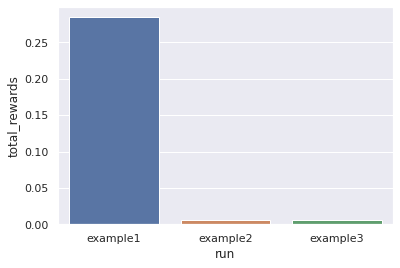

In [3]:
"""
bar_plot_episodic is used to compare any single scaler value across all sets of data.
In this example we visualize the total reward (sum of all rewards in the episode) across all three episodes.
"""
analysis.bar_plot_episodic("total_rewards", data)

In [3]:
"""
histogram_episodic creates a histogram for each data set for the given key. In this case we will be creating
histogram of the energies of the conformers gneerated in each episode.
"""
fig, axes = analysis.histogram_episodic("energy", data)


In [4]:
"""
calculate_tfd() calculates the TFD (Torsional Fingerprint Deviation) matrix between all conformers for each dataset.
The TFD measures how similar the conformers are to each other and is helpful for determining the diversity of the conformers generated.
"""
analysis.calculate_tfd(data)

(<Figure size 1440x576 with 6 Axes>,
 array([<AxesSubplot:xlabel='example1'>, <AxesSubplot:xlabel='example2'>,
        <AxesSubplot:xlabel='example3'>], dtype=object))

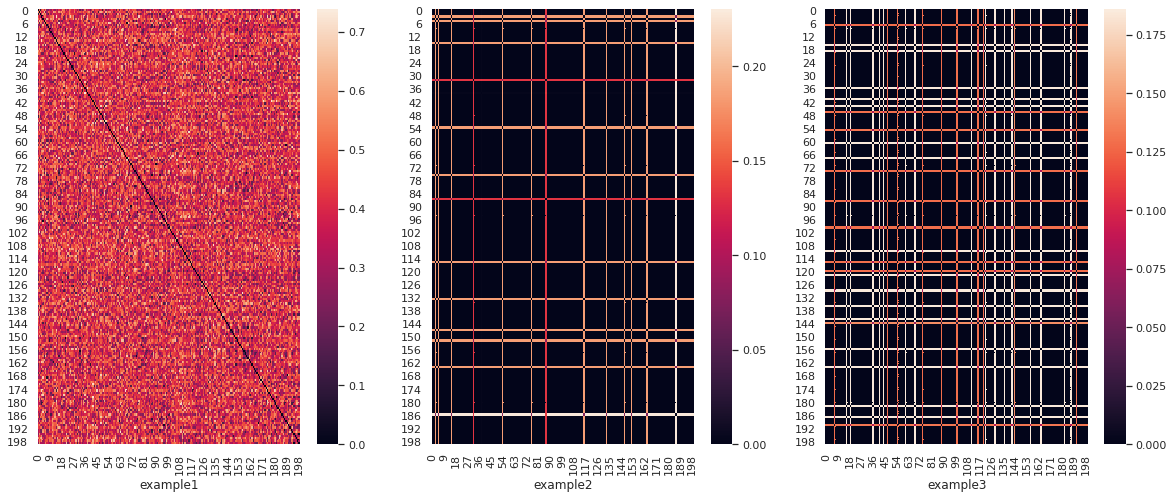

In [5]:

"""
We can then visualize the TFD matrices generated for each dataset.

Notice that second and third datasets have a lot of conformer pairs with low TFD. This means
that the agent generated many duplicate conformers.
"""
analysis.heatmap_episodic('tfd_matrix', data)

<AxesSubplot:xlabel='run', ylabel='tfd_total'>

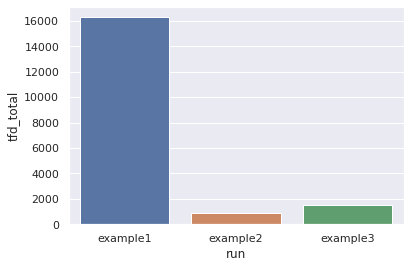

In [6]:
"""
We can also visualize the sum of the TFD matrices for each dataset.
"""
analysis.bar_plot_episodic('tfd_total', data)

In [7]:
"""
Finally, we can visualize a single molecule from one of the datasets.
"""
analysis.drawConformer(data['mol'][0], confId=5, style='stick')

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [8]:
"""
We can also choose a conformer from each dataset and compare them.
"""
analysis.drawConformer_episodic(data, confIds=[4, 18, 12], style='stick')

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol